In [35]:
import sys
sys.path.append('../..')

import math
import navbench as nb
import navbench.imgproc as ip

import matplotlib.pyplot as plt
import numpy as np

PREPROC = (ip.resize(55, 180), ip.remove_sky)
MEDFILT = 11
SNAP_STEP = 10

def load_db(path):
    db = nb.Database("../../datasets/rc_car/Stanmer_park_dataset/" + path)
    print('Database %s has %d images' % (path, len(db)))
    return db

def get_ca_sizes(db, images, snapshots):
    ca_sizes = []
    num_inf = 0
    for goal_idx, snap in enumerate(snapshots):
        diffs = nb.mean_absdiff(images, snap)
        ca = nb.calculate_ca(diffs, goal_idx, MEDFILT)
        size = db.calculate_distance(*ca.get_finite_bounds())
        num_inf += math.isinf(ca.size())
        ca_sizes.append(size)

    if num_inf:
        print("WARNING: %i/%i CAs extended beyond route end" % (num_inf, len(ca_sizes)))

    print('CA range: [%f, %f]' % (np.amin(ca_sizes), np.amax(ca_sizes)))
    return ca_sizes

names = ['0411/unwrapped_dataset1', '0411/unwrapped_dataset2']
db1 = load_db(names[0])
db2 = load_db(names[1])

images1 = db1.read_images(preprocess=PREPROC)
snapshots1 = images1[0::SNAP_STEP]
ca_sizes1 = get_ca_sizes(db1, images1, snapshots1)
images2 = db2.read_images(preprocess=PREPROC)
ca_sizes2 = get_ca_sizes(db2, images2, snapshots1)

Database 0411/unwrapped_dataset1 has 480 images
Database 0411/unwrapped_dataset2 has 400 images
CA range: [0.000000, 3.837031]
CA range: [0.000000, 2.877797]


Text(0, 0.5, 'CA size (m) [0411/unwrapped_dataset2]')

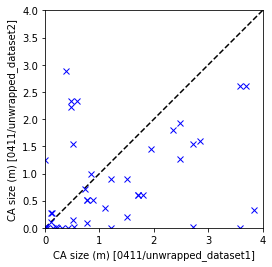

In [36]:
_, ax = plt.subplots()
ax.plot([0, 7], [0, 7], 'k--')
ax.plot(ca_sizes1, ca_sizes2, 'bx')
ax.axis('square')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_xlabel('CA size (m) [%s]' % names[0])
ax.set_ylabel('CA size (m) [%s]' % names[1]);

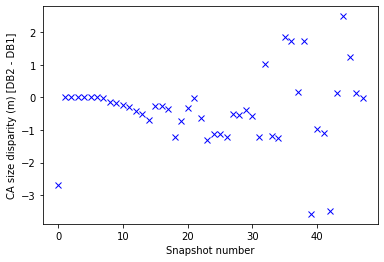

In [42]:
_, ax = plt.subplots()
ax.plot(np.array(ca_sizes2) - np.array(ca_sizes1), 'bx')
ax.set_ylabel('CA size disparity (m) [DB2 - DB1]')
ax.set_xlabel('Snapshot number');